In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## **Splitting Test data and Training Data into Columns** 

In [26]:
df_test = pd.read_csv('/Users/alex/Desktop/GIT/MLP_ASSSIGNMENT-1/NON_SEPARABLE_CLASSIFICATION/SPC-Testing.csv',sep='\s+',header=None,engine='python')
print('Test Data:')
display(df_test.head())
print()
df_train = pd.read_csv('/Users/alex/Desktop/GIT/MLP_ASSSIGNMENT-1/NON_SEPARABLE_CLASSIFICATION/SPC-Training.csv', sep ='\s+',header=None, engine='python')
print('Train Data:')
display(df_train.head())


Test Data:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.691,-2.426,1.440,-2.688,2.240,-2.577,1.541,-0.045,-1.093,-0.498,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.337,-0.014,-1.134,1.714,1.821,-1.989,-1.056,-1.823,2.408,0.906,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.278,0.169,-2.756,-0.819,2.074,2.179,-0.616,1.405,-2.847,0.325,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.156,1.827,1.084,-0.675,-2.409,2.970,1.037,-1.972,-0.191,1.514,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.849,-2.715,0.909,-0.211,2.050,-2.632,1.746,-0.534,1.426,-1.512,1.0,0.0,0.0,0.0,0.0,0.0,0.0



Train Data:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.691,-2.426,1.440,-2.688,2.240,-2.577,1.541,-0.045,-1.093,-0.498,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.337,-0.014,-1.134,1.714,1.821,-1.989,-1.056,-1.823,2.408,0.906,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.278,0.169,-2.756,-0.819,2.074,2.179,-0.616,1.405,-2.847,0.325,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.156,1.827,1.084,-0.675,-2.409,2.970,1.037,-1.972,-0.191,1.514,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.849,-2.715,0.909,-0.211,2.050,-2.632,1.746,-0.534,1.426,-1.512,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X_train_df = df_train.iloc[:,:10]
y_train_df = df_train.iloc[:,10:]
X_test_df = df_test.iloc[:,:10]
y_test_df = df_test.iloc[:,10:]

### **Check whether data needs normalization**

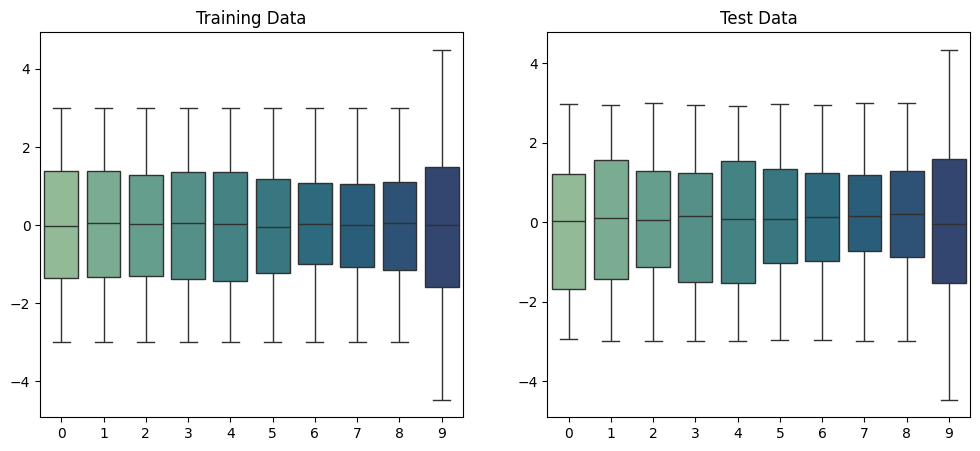

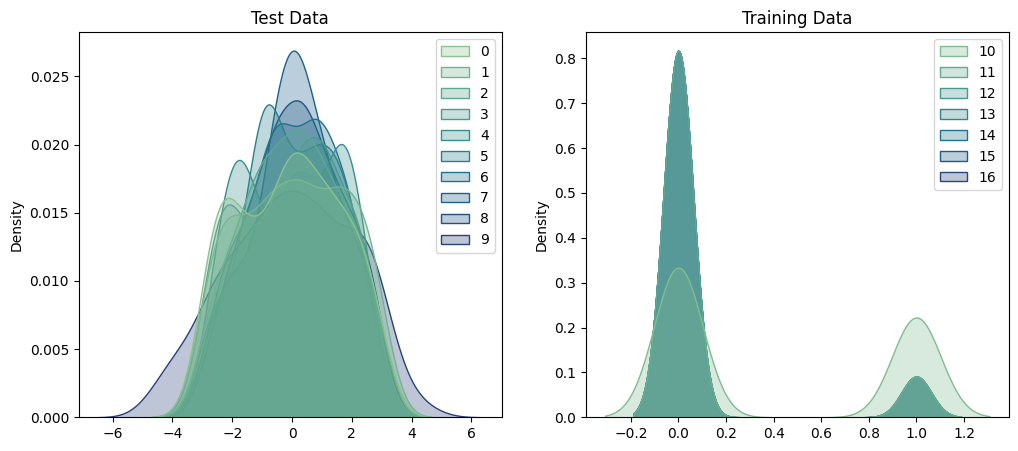

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train_df,palette='crest').set_title('Training Data')
plt.subplot(1,2,2)
sns.boxplot(data = X_test_df,palette='crest').set_title('Test Data')
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data = X_test_df, fill=True,palette= 'crest', alpha = .3, linewidth = 1).set_title('Test Data')
plt.subplot(1,2,2)
sns.kdeplot(data = y_train_df, fill = True,palette='crest', alpha = .3, linewidth = 1).set_title('Training Data')
plt.show()

In [29]:
X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df.values
y_test = y_test_df.values

## **Build Model**

### **Training the model using best parameters**

In [30]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(40, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(56, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model

In [31]:
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
model = get_model(n_inputs,n_outputs)
model.fit(X_train, y_train, verbose=0, epochs=300)
print(model.metrics_names)

['loss', 'compile_metrics']


## **Best score on training dataset** 

In [32]:
score = model.evaluate(X_train, y_train, verbose=0) 
print('Train loss:', score[0]) 
print('Train accuracy:', score[1]) 

Train loss: 0.003376501379534602
Train accuracy: 0.9995999932289124


## **Best score on testing dataset** 

In [33]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss:', score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.11038623005151749
Test Accuracy: 0.9200000166893005


## **Confusion Matrix to Understand Prediction Errors**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Figure size 1000x800 with 0 Axes>

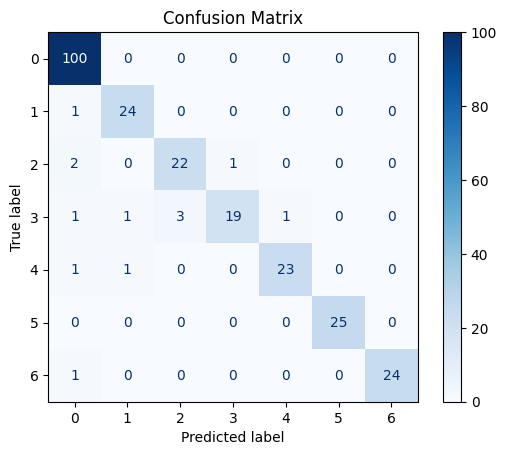

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_labels, y_pred)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

## **Class Distribution Analysis**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


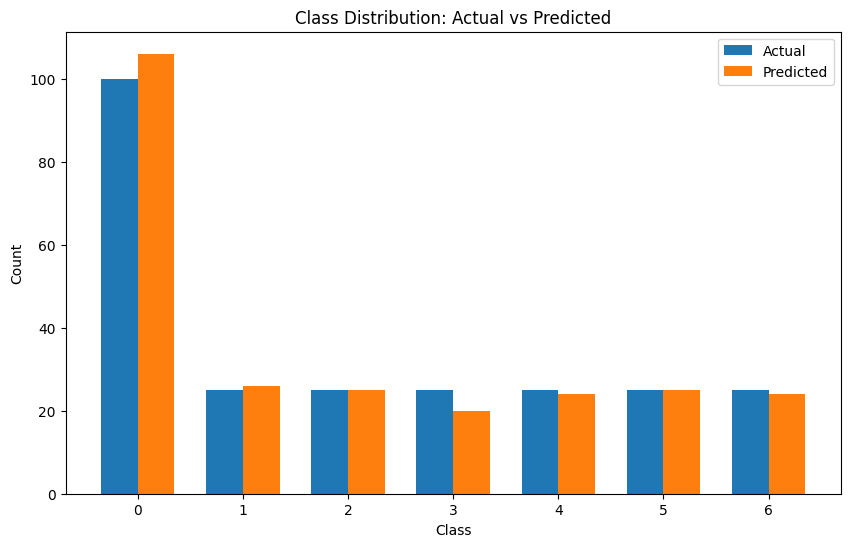

In [101]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

pred_counts = np.bincount(y_pred)
true_counts = np.bincount(y_true)

width = 0.35
x = np.arange(len(pred_counts))
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, true_counts, width, label='Actual')
plt.bar(x + width/2, pred_counts, width, label='Predicted')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution: Actual vs Predicted')
plt.xticks(x)
plt.legend()
plt.show()

## **Sequence Plot of Actual and Predicted Values**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


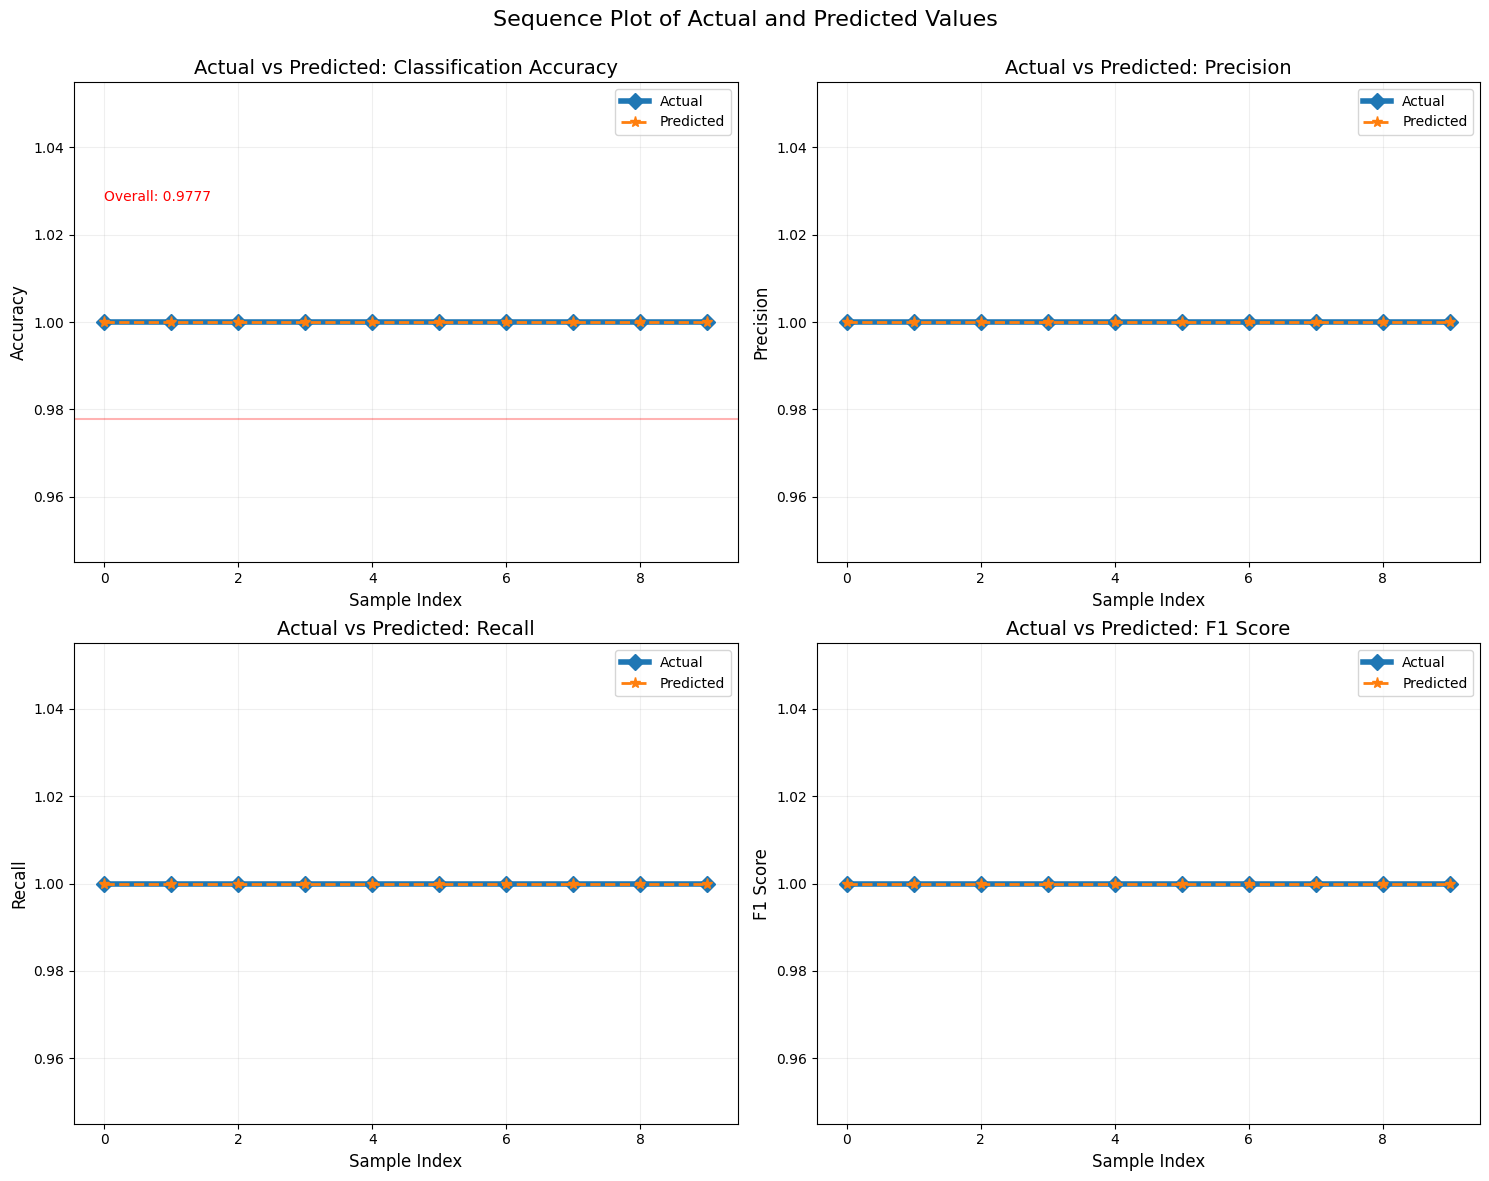

In [36]:
y_pred_prob = model.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

num_samples = min(10, len(X_test))
sample_indices = list(range(num_samples))

precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

for i in range(num_samples):
   accuracy = np.mean(np.equal(y_test[i], y_pred_binary[i]))
   accuracy_scores.append(accuracy)

   true_positives = np.sum((y_test[i] == 1) & (y_pred_binary[i] == 1))
   false_positives = np.sum((y_test[i] == 0) & (y_pred_binary[i] == 1))
   precision = true_positives / (true_positives + false_positives + 1e-10)
   precision_scores.append(precision)
   
   false_negatives = np.sum((y_test[i] == 1) & (y_pred_binary[i] == 0))
   recall = true_positives / (true_positives + false_negatives + 1e-10)
   recall_scores.append(recall)

   f1 = 2 * (precision * recall) / (precision + recall + 1e-10)
   f1_scores.append(f1)

overall_accuracy = np.mean(np.equal(y_test, y_pred_binary))

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].plot(sample_indices, accuracy_scores, 'D-', linewidth=4, markersize=8, label='Actual')
axes[0, 0].plot(sample_indices, accuracy_scores, '*--', linewidth=2, markersize=8, label='Predicted')
axes[0, 0].set_title('Actual vs Predicted: Classification Accuracy', fontsize=14)
axes[0, 0].set_xlabel('Sample Index', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].grid(True, alpha=0.2)
axes[0, 0].legend()

axes[0, 0].axhline(y=overall_accuracy, color='r', linestyle='-', alpha=0.3)
axes[0, 0].text(0, overall_accuracy + 0.05, f'Overall: {overall_accuracy:.4f}', color='r')

axes[0, 1].plot(sample_indices, precision_scores, 'D-', linewidth=4, markersize=8, label='Actual')
axes[0, 1].plot(sample_indices, precision_scores, '*--', linewidth=2, markersize=8, label='Predicted')
axes[0, 1].set_title('Actual vs Predicted: Precision', fontsize=14)
axes[0, 1].set_xlabel('Sample Index', fontsize=12)
axes[0, 1].set_ylabel('Precision', fontsize=12)
axes[0, 1].grid(True, alpha=0.2)
axes[0, 1].legend()

axes[1, 0].plot(sample_indices, recall_scores, 'D-', linewidth=4, markersize=8, label='Actual')
axes[1, 0].plot(sample_indices, recall_scores, '*--', linewidth=2, markersize=8, label='Predicted')
axes[1, 0].set_title('Actual vs Predicted: Recall', fontsize=14)
axes[1, 0].set_xlabel('Sample Index', fontsize=12)
axes[1, 0].set_ylabel('Recall', fontsize=12)
axes[1, 0].grid(True, alpha=0.2)
axes[1, 0].legend()

axes[1, 1].plot(sample_indices, f1_scores, 'D-', linewidth=4, markersize=8, label='Actual')
axes[1, 1].plot(sample_indices, f1_scores, '*--', linewidth=2, markersize=8, label='Predicted')
axes[1, 1].set_title('Actual vs Predicted: F1 Score', fontsize=14)
axes[1, 1].set_xlabel('Sample Index', fontsize=12)
axes[1, 1].set_ylabel('F1 Score', fontsize=12)
axes[1, 1].grid(True, alpha=0.2)
axes[1, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle('Sequence Plot of Actual and Predicted Values', fontsize=16)
plt.show()